# Visualization in Python

[Recording of lecture from 1/19/2022](https://uci.zoom.us/rec/play/hTqfyDlKjP85g3nw5_mQDak9OKyIFmY5kn6dOiW7nDzZsKce_heexreKHBh9gKJ-sEIbJzX4UQ9MalE.sOsJfZkgmX4ZunE0)

The most important visualization library in Math 10 is Altair.  Today I want to introduce Altair and two other similar libraries, Seaborn and Plotly Express.  All three of these are based on a concept called the *Grammar of Graphics*, which I believe was invented in this book, [The Grammar of Graphics](https://link.springer.com/book/10.1007/0-387-28695-0), which is free to download from on campus or using VPN.

The most famous visualization library in Python is Matplotlib.  We won't talk about Matplotlib today.  It is quite different from the libraries we will discuss today (Seaborn is built on top of Matplotlib).

In [2]:
import numpy as np
import pandas as pd
import altair as alt
import seaborn as sns
import plotly.express as px

In [3]:
np.arange(0,1.1,0.25)

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

Here is the "by hand" way to make a pandas DataFrame.

Using `np.arange` is a little difficult in this context because we need to make sure its length is the same as the length of the other columns.

In [4]:
df = pd.DataFrame({"a":[3,1,4,2],"b":[10,5,6,8],"c":["first","second","third","fourth"],
    "d":np.arange(0.2,1.1,0.25)})
df

a   b       c     d
0  3  10   first  0.20
1  1   5  second  0.45
2  4   6   third  0.70
3  2   8  fourth  0.95

Put your mouse over one of the points to see the effect of the tooltip.

In [5]:
alt.Chart(df).mark_circle().encode(
    x = "a",
    y = "b",
    color = "d",
    size = "d",
    tooltip = ["a","c"]
)

alt.Chart(...)

In [6]:
alt.Chart(df).mark_bar().encode(
    x = "a",
    y = "b"
)

alt.Chart(...)

In [8]:
alt.Chart(df).mark_bar(width=30).encode(
    x = "a",
    y = "b"
)

alt.Chart(...)

To make a scatter plot in Altair, you use `mark_circle`.  In Seaborn, you use `scatterplot`.  The syntax is very similar.

<AxesSubplot:xlabel='a', ylabel='b'>

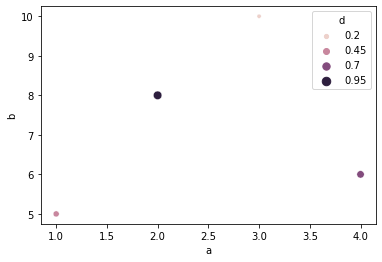

In [9]:
sns.scatterplot(
    data = df,
    x = "a",
    y = "b",
    hue = "d",
    size = "d",
)

The same thing for Plotly Express.

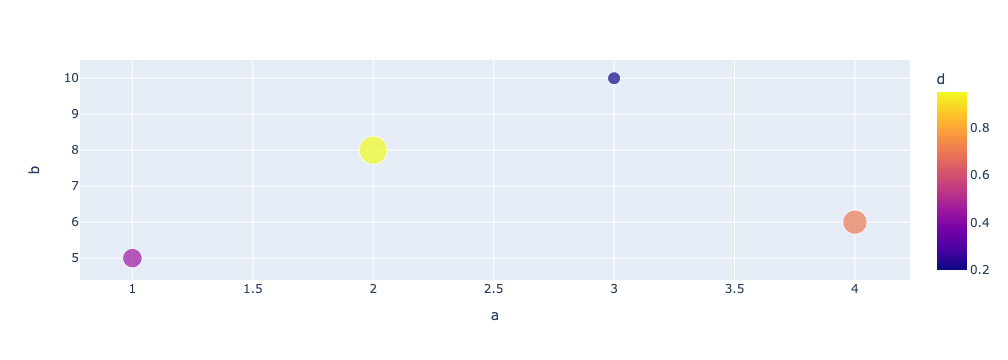

In [10]:
px.scatter(
    data_frame=df,
    x = "a",
    y = "b",
    color = "d",
    size = "d",
)

## Penguins dataset from Seaborn

In [11]:
df = sns.load_dataset("penguins")

In [12]:
df.head()

species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    Male  
1       3800.0  Female  
2       3250.0  Female  
3          NaN     NaN  
4       3450.0  Female

In [13]:
df.shape

(344, 7)

In [14]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [15]:
alt.Chart(df).mark_circle().encode(
    x = "bill_length_mm",
    y = "bill_depth_mm",
    color = "species"
)

alt.Chart(...)

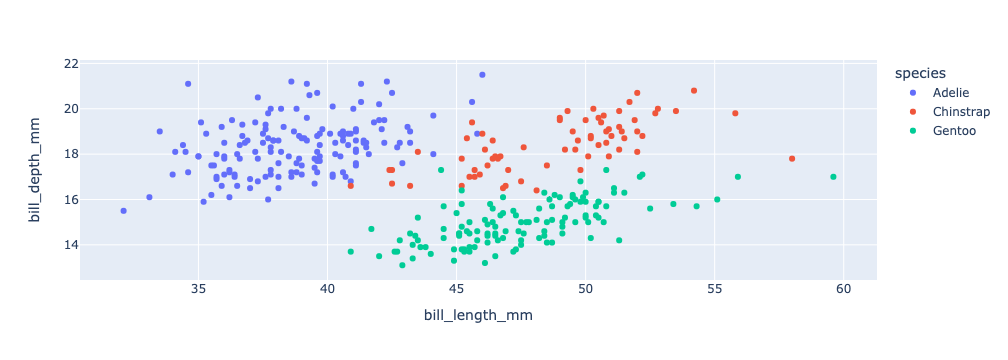

In [16]:
px.scatter(
    data_frame=df,
    x = "bill_length_mm",
    y = "bill_depth_mm",
    color = "species"
)

<AxesSubplot:xlabel='bill_length_mm', ylabel='bill_depth_mm'>

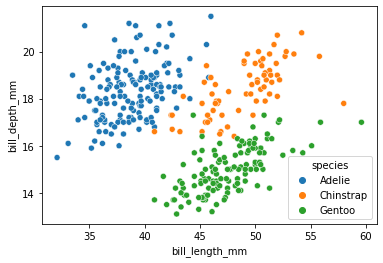

In [17]:
sns.scatterplot(
    data = df,
    x = "bill_length_mm",
    y = "bill_depth_mm",
    hue = "species"
)

By default, the Altair axes will include 0.  If you want to remove them, the code gets a little longer.

In [19]:
alt.Chart(df).mark_circle().encode(
    x = alt.X("bill_length_mm",scale = alt.Scale(zero=False)),
    y = alt.Y("bill_depth_mm", scale = alt.Scale(zero=False)),
    color = "species"
)

alt.Chart(...)

Adding a tooltip that includes all the data.

In [21]:
alt.Chart(df).mark_circle().encode(
    x = alt.X("bill_length_mm",scale = alt.Scale(zero=False)),
    y = alt.Y("bill_depth_mm", scale = alt.Scale(zero=False)),
    color = "species",
    size = "body_mass_g",
    opacity = "body_mass_g",
    tooltip = list(df.columns)
)

alt.Chart(...)

Plotting just the data from rows 200 to 300.

In [22]:
alt.Chart(df[200:300]).mark_circle().encode(
    x = alt.X("bill_length_mm",scale = alt.Scale(zero=False)),
    y = alt.Y("bill_depth_mm", scale = alt.Scale(zero=False)),
    color = "species",
    size = "body_mass_g",
    opacity = "body_mass_g",
    tooltip = list(df.columns)
)

alt.Chart(...)

`df[200:300]` and `df.iloc[200:300]` mean the same thing; the one is just an abbreviation for the other.

Can you find the point on the above plot that corresponds to row 200?

In [26]:
df.iloc[200:300]

species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
200  Chinstrap   Dream            51.5           18.7              187.0   
201  Chinstrap   Dream            49.8           17.3              198.0   
202  Chinstrap   Dream            48.1           16.4              199.0   
203  Chinstrap   Dream            51.4           19.0              201.0   
204  Chinstrap   Dream            45.7           17.3              193.0   
..         ...     ...             ...            ...                ...   
295     Gentoo  Biscoe            48.6           16.0              230.0   
296     Gentoo  Biscoe            47.5           14.2              209.0   
297     Gentoo  Biscoe            51.1           16.3              220.0   
298     Gentoo  Biscoe            45.2           13.8              215.0   
299     Gentoo  Biscoe            45.2           16.4              223.0   

     body_mass_g     sex  
200       3250.0    Male  
201       3675.0  Female  
202       3325.0  Female  
203       3950.0    Male  
204       3600.0  Female  
..           ...     ...  
295       5800.0    Male  
296       4600.0  Female  
297       6000.0    Male  
298       4750.0  Female  
299       5950.0    Male  

[100 rows x 7 columns]

In [47]:
df.columns

Index(['species', 'island', 'bill_length_mm', 'bill_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [49]:
type(df.columns)

pandas.core.indexes.base.Index

In [50]:
list(df.columns)

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

The best way to convert `df.columns` from a pandas Index into a list is to use `list(df.columns)`.  Just for practice, we also convert it into a list using list comprehension.

In [27]:
[c for c in df.columns]

['species',
 'island',
 'bill_length_mm',
 'bill_depth_mm',
 'flipper_length_mm',
 'body_mass_g',
 'sex']

Instead of the penguins dataset, there are others we could have imported also.

In [28]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'taxis',
 'tips',
 'titanic']

In [29]:
df_tips = sns.load_dataset("tips")

In [30]:
df_tips

total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner     2
1         10.34  1.66    Male     No   Sun  Dinner     3
2         21.01  3.50    Male     No   Sun  Dinner     3
3         23.68  3.31    Male     No   Sun  Dinner     2
4         24.59  3.61  Female     No   Sun  Dinner     4
..          ...   ...     ...    ...   ...     ...   ...
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

[244 rows x 7 columns]

We can save this using the `to_csv` method.  If you don't want the row names included (the "index"), then set `index = false`.

In [31]:
df_tips.to_csv("tips.csv", index=False)

In Deepnote, if you click on the corresponding csv file in the files section, it will automatically sort the rows.  Here is how you do that same thing using pandas.

In [32]:
df_tips.sort_values("total_bill",ascending=False)

total_bill    tip     sex smoker   day    time  size
170       50.81  10.00    Male    Yes   Sat  Dinner     3
212       48.33   9.00    Male     No   Sat  Dinner     4
59        48.27   6.73    Male     No   Sat  Dinner     4
156       48.17   5.00    Male     No   Sun  Dinner     6
182       45.35   3.50    Male    Yes   Sun  Dinner     3
..          ...    ...     ...    ...   ...     ...   ...
149        7.51   2.00    Male     No  Thur   Lunch     2
111        7.25   1.00  Female     No   Sat  Dinner     1
172        7.25   5.15    Male    Yes   Sun  Dinner     2
92         5.75   1.00  Female    Yes   Fri  Dinner     2
67         3.07   1.00  Female    Yes   Sat  Dinner     1

[244 rows x 7 columns]